## About
This notebook contains code that was supposed to simulate the Ising Model with a large range of spins. But the code does not work as intended as of now.

In [1]:
import numpy
import matplotlib.pyplot as plt
import math

In [2]:
class Ising(object):
    def __init__(self):
        self.radius = None
        self.cols = None
        self.rows = None
        self.temperature = None
        def h():
            return 0
        self.h = h
        self.concentration_a = None
        self.concentration_b = None
        self.mean_a = None
        self.mean_b = None
        self.grid = None
    
    def _set(self, prop, val):
        self.__dict__.update({prop: val})
        
    def flip_probability(self, delta):
        return numpy.exp(-delta/self.temperature)
    
    def display(self):
        plt.figure(figsize = (8, 8))
        plt.imshow(self.grid, cmap='Greys', interpolation='sinc')
        plt.show()
        
    def mean_value(self):
        tot = 0
        for row in self.grid:
            for cell in row:
                tot += cell
        return tot/(self.cols*self.rows)
    
    def energy_at(self, row, col, h):
        tot = 0
        for i in range(row - self.radius, row + self.radius + 1):
            if i != row:
                r = (i if i < self.rows else i - self.rows)
                tot += self.grid[r][col]
        for j in range(col - self.radius, col + self.radius + 1):
            if j != col:
                c = (j if j < self.cols else j - self.cols)
                tot += self.grid[row][c]
        tot *= self.grid[row][col]+h
        return tot
                
    def init_grid(self):
        self.grid = [[None for i in range(self.cols)] for j in range(self.rows)]
        
    def fill_grid(self):
        num_a = int(round(self.concentration_a*self.cols*self.rows, 0))
        num_b = self.rows*self.cols - num_a
        dist_a = []
        dist_b = []
        for i in range(num_a):
            dist_a.append(round(numpy.random.randn()*numpy.power(abs(self.mean_a-0), 0.5) + self.mean_a))
        for i in range(num_b):
            dist_b.append(round(numpy.random.randn()*numpy.power(abs(self.mean_b-0), 0.5) + self.mean_b))
        while len(dist_a) > 0:
            row = numpy.random.choice(self.rows)
            col = numpy.random.choice(self.cols)
            index = numpy.random.choice(len(dist_a))
            if self.grid[row][col] == None:
                self.grid[row][col] = dist_a.pop(index)
        while len(dist_b) > 0:
            row = numpy.random.choice(self.rows)
            col = numpy.random.choice(self.cols)
            index = numpy.random.choice(len(dist_b))
            if self.grid[row][col] == None:
                self.grid[row][col] = dist_b.pop(index)
                
    def iterate(self, h, verbose):
        row = numpy.random.choice(self.rows)
        col = numpy.random.choice(self.cols)
        if verbose:
            print("row:", row)
            print("col:", col)
        e1 = self.energy_at(row, col, h)
        self.grid[row][col] *= -1
        e2 = self.energy_at(row, col, h)
        if e2 >= e1:
            probability = self.flip_probability(e2-e1)
            if numpy.random.random() > probability:
                self.grid[row][col] *= -1
                
    def simulate(self, h, runs=10000, record=True):
        if not callable(h):
            raise TypeError("h must be a function")
        if record:
            self.mags = [self.mean_value()]
        for i in range(runs):
            self.iterate(h(), False)
            if record:
                self.mags.append(self.mean_magnetization)

In [3]:
mag = []
for i in range(100):
    a = Ising()
    a.radius = 1
    a.rows = 16
    a.cols = 16
    a.temperature = 1 + i/25
    a.concentration_a = 0.6
    a.concentration_b = 0.4
    a.mean_a = 5
    a.mean_b = -4
    a.init_grid()
    a.fill_grid()
    def h():
        return 0
    a.simulate(record = False, h=h)
    mag.append(a.mean_value())

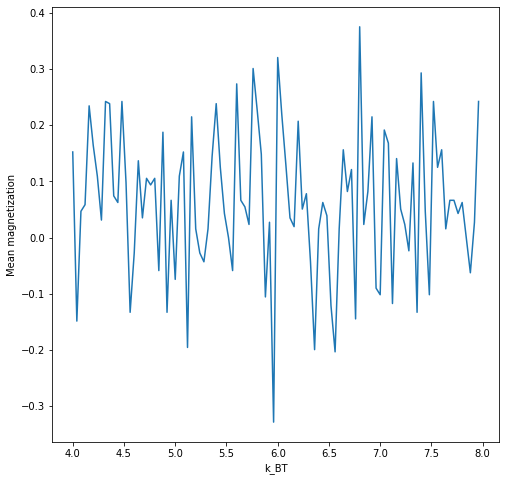

In [4]:
plt.figure(figsize = (8, 8))
plt.plot([i/25 for i in range(100, 200)], mag)
plt.xlabel(r"k_BT")
plt.ylabel("Mean magnetization")
plt.show()

In [5]:
mag = []
for i in range(100):
    a = Ising()
    a.radius = 1
    a.rows = 16
    a.cols = 16
    a.temperature = 1 + i/25
    a.concentration_a = 0.6
    a.concentration_b = 0.4
    a.mean_a = 5
    a.mean_b = -4
    a.init_grid()
    a.fill_grid()
    a.simulate(record=False, h=numpy.random.random)
    mag.append(a.mean_value())

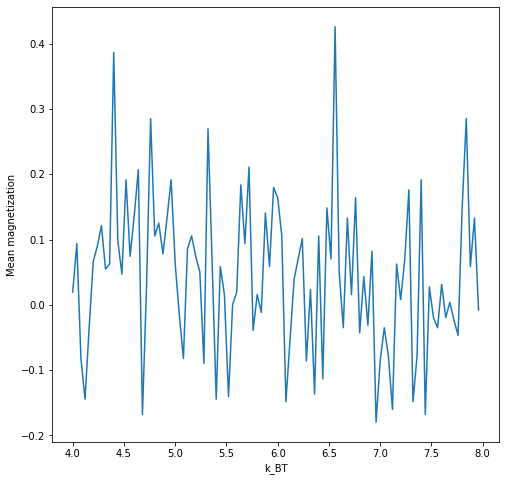

In [6]:
plt.figure(figsize = (8, 8))
plt.plot([i/25 for i in range(100, 200)], mag)
plt.xlabel(r"k_BT")
plt.ylabel("Mean magnetization")
plt.show()